In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
covertype = fetch_ucirepo(id=31)

# data (as pandas dataframes)
X = covertype.data.features
y = covertype.data.targets

# metadata
print(covertype.metadata)

# variable information
print(covertype.variables)



{'uci_id': 31, 'name': 'Covertype', 'repository_url': 'https://archive.ics.uci.edu/dataset/31/covertype', 'data_url': 'https://archive.ics.uci.edu/static/public/31/data.csv', 'abstract': 'Classification of pixels into 7 forest cover types based on attributes such as elevation, aspect, slope, hillshade, soil-type, and more.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 581012, 'num_features': 54, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['Cover_Type'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Sat Mar 16 2024', 'dataset_doi': '10.24432/C50K5N', 'creators': ['Jock Blackard'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting forest cover type from cartographic variables only (no remotely sensed data).  The actual forest cover type for a given observation (30 x 30 meter cell) was determined from

In [ ]:
print(y)

        Cover_Type
0                5
1                5
2                2
3                2
4                5
...            ...
581007           3
581008           3
581009           3
581010           3
581011           3

[581012 rows x 1 columns]


In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns (excluding one-hot encoded)
numerical_cols = ['Elevation', 'Aspect', 'Slope',
                  'Horizontal_Distance_To_Hydrology',
                  'Vertical_Distance_To_Hydrology',
                  'Horizontal_Distance_To_Roadways',
                  'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                  'Horizontal_Distance_To_Fire_Points']

# Scale numerical features
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

<ipython-input-2-9ab68432e57a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_cols] = scaler.fit_transform(X[numerical_cols])


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit model
model = LogisticRegression(
    multi_class='multinomial',  # For >2 classes
    solver='lbfgs',            # Good for small-to-medium datasets
    max_iter=1000,             # Increase if convergence warning appears
    random_state=42
)
model.fit(X_train, y_train)

# Evaluate
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f"Train Accuracy: {train_score:.3f}, Test Accuracy: {test_score:.3f}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Train Accuracy: 0.725, Test Accuracy: 0.725


In [ ]:
coefficients = pd.DataFrame(
    model.coef_,
    columns=X.columns,
    index=[f"Class_{i+1}" for i in range(7)]  # Classes 0-6 correspond to 1-7
)
print(coefficients.head())

         Elevation    Aspect     Slope  Horizontal_Distance_To_Hydrology  \
Class_1   3.331939 -0.160309  0.032396                         -0.222775   
Class_2   0.993730 -0.143747  0.128086                          0.188271   
Class_3  -3.555183  0.187736 -0.015773                          0.902375   
Class_4  -5.103145  0.009550 -0.358948                         -0.534126   
Class_5   0.216820  0.176730  0.208174                         -0.030896   

         Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
Class_1                       -0.248471                        -0.491242   
Class_2                       -0.191978                        -0.334540   
Class_3                        0.038406                         0.065291   
Class_4                        0.667357                         2.369531   
Class_5                        0.105479                        -1.076792   

         Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
Class_1      -0.292168       

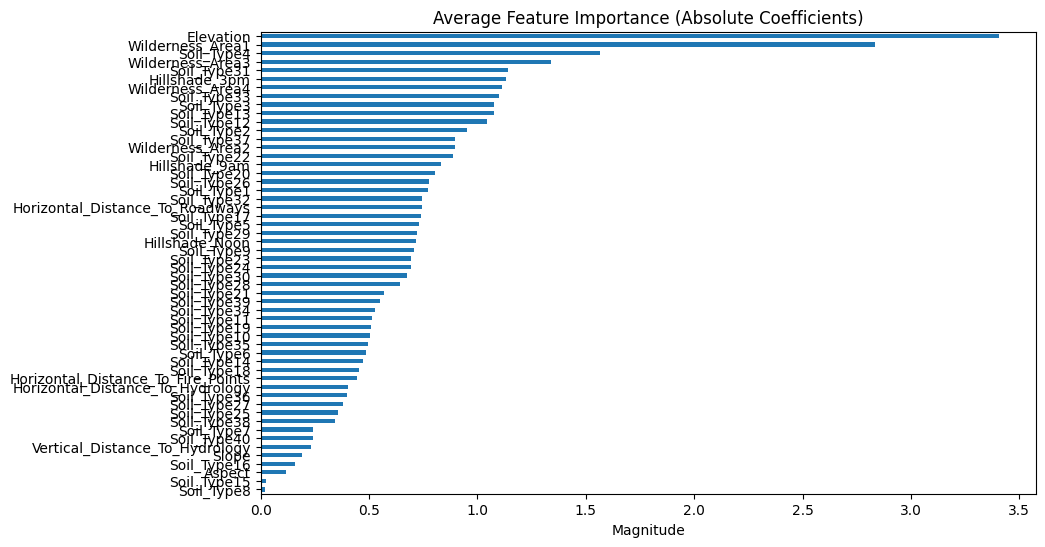

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get coefficients (for multinomial logistic regression)
coefficients = pd.DataFrame(
    model.coef_,
    columns=X.columns,
    index=[f"Class_{i+1}" for i in range(7)]  # Classes 1-7
)

# Plot absolute mean coefficient magnitudes
plt.figure(figsize=(10, 6))
coefficients.abs().mean(axis=0).sort_values().plot(kind='barh')
plt.title("Average Feature Importance (Absolute Coefficients)")
plt.xlabel("Magnitude")
plt.show()

In [ ]:
import pandas as pd

# Get feature importance (absolute mean coefficients across classes)
coefficients = pd.DataFrame(
    model.coef_,
    columns=X.columns,
    index=[f"Class_{i+1}" for i in range(7)]
)
top_features = coefficients.abs().mean(axis=0).sort_values(ascending=False).index[:2]
print("Top 2 Features:", top_features)

Top 2 Features: Index(['Elevation', 'Wilderness_Area1'], dtype='object')


In [ ]:
import pandas as pd
import numpy as np

# Get coefficients (shape: [n_classes, n_features])
coefficients = model.coef_

# Create a DataFrame for readability
feature_importance = pd.DataFrame(
    coefficients.T,  # Transpose to align features with coefficients
    columns=[f"Class_{i+1}" for i in range(7)],  # 7 classes (Cover_Type 1-7)
    index=X.columns  # Feature names
)

In [ ]:
# Compute mean absolute impact across classes
feature_importance['Overall_Importance'] = np.abs(coefficients).mean(axis=0)

# Sort by importance
top_features = feature_importance.sort_values('Overall_Importance', ascending=False).head(5)

<ipython-input-9-d6f32f368265>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


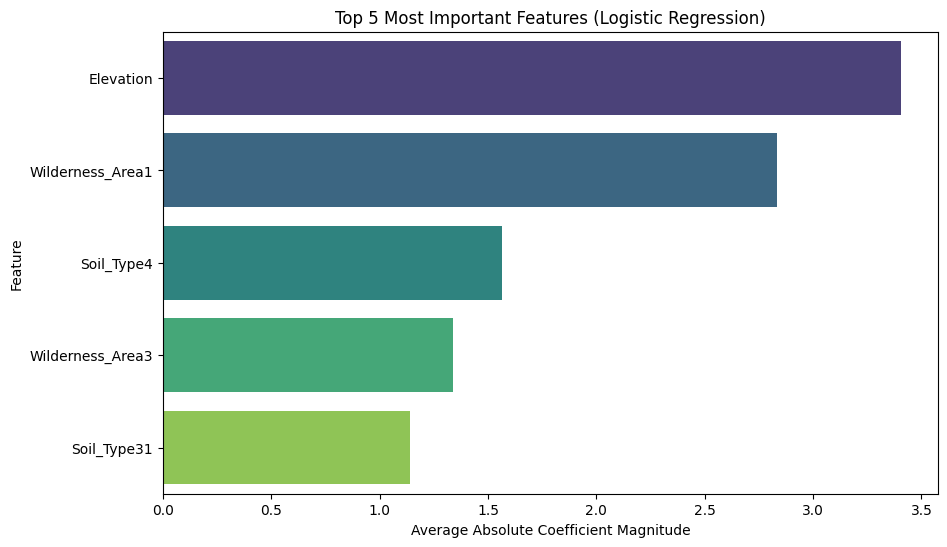

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_features['Overall_Importance'],
    y=top_features.index,
    palette='viridis'
)
plt.title('Top 5 Most Important Features (Logistic Regression)')
plt.xlabel('Average Absolute Coefficient Magnitude')
plt.ylabel('Feature')
plt.show()

<Axes: ylabel='None'>

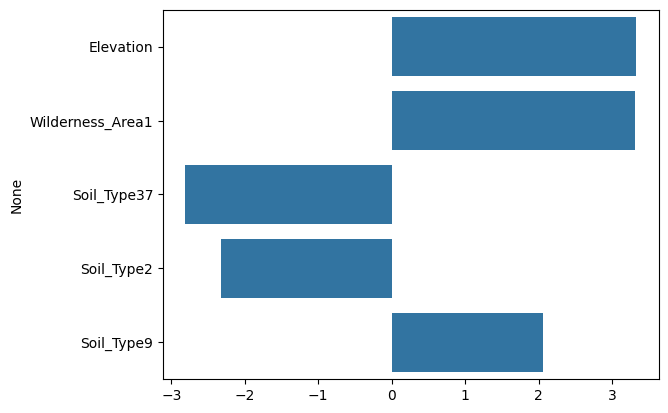

In [ ]:
# Plot coefficients for Class_1
class1_coeffs = feature_importance['Class_1'].sort_values(key=abs, ascending=False).head(5)
sns.barplot(x=class1_coeffs.values, y=class1_coeffs.index)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Assuming you already trained the model (see previous steps)
y_pred_logistic = model.predict(X_test)  # Class labels (0-6)

In [ ]:
from sklearn.metrics import classification_report

# Logistic Regression
print("Logistic Regression Metrics:")
print(classification_report(y_test, y_pred_logistic, target_names=[f"Class_{i+1}" for i in range(7)]))


Logistic Regression Metrics:
              precision    recall  f1-score   support

     Class_1       0.71      0.70      0.71     42557
     Class_2       0.75      0.80      0.77     56500
     Class_3       0.68      0.80      0.74      7121
     Class_4       0.57      0.40      0.47       526
     Class_5       0.23      0.01      0.01      1995
     Class_6       0.49      0.26      0.34      3489
     Class_7       0.72      0.58      0.64      4015

    accuracy                           0.72    116203
   macro avg       0.59      0.51      0.53    116203
weighted avg       0.71      0.72      0.71    116203

